In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import csv
urls_telegram_toor = []

with open('telegram_rubriigid_arhiiv.csv', 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for line in reader:
        if line != []:
            urls_telegram_toor.append(line[0])
print(len(urls_telegram_toor))

6272


In [3]:
def my_function(x):
      return list(dict.fromkeys(x))

urls_telegram = my_function(urls_telegram_toor)

print(len(urls_telegram))

5052


In [4]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd

pealkirjad = []
tekstid = []
väljaanded = []
ajad =[]

for url in tqdm(urls_telegram):
    page = requests.get(url)

    soup = BeautifulSoup(page.content, "html.parser")
    pealkiri = soup.find("meta", {"property" : "og:title"})['content']
    väljaanne = soup.find("meta", {"property" : "og:site_name"})['content']
    aeg = soup.find("meta", {"property" : "article:published_time"})['content']
    
    results = soup.find("div", attrs = {"class" : "left articlecontent"})
    artikkel = results.find_all("div")

    for art in artikkel:
        loik = art.find_all("p")
        for l in loik:
            tekst = l.text.replace('\n',' ')
            tekst = tekst.replace('\xa0',' ')
            break
    tekstid.append(tekst.strip())
            

    pealkirjad.append(pealkiri)
    väljaanded.append(väljaanne)
    ajad.append(aeg)

100%|████████████████████████████████████████████████████████████████████████████| 5052/5052 [1:08:12<00:00,  1.23it/s]


In [5]:
artiklid = {'title': pealkirjad, 'text': tekstid,'subject': väljaanded, 'date': ajad, 'link': urls_telegram}

In [6]:
data_telegram_rubriigid = pd.DataFrame(artiklid, columns = ['title', 'text','subject', 'date', 'link'])

In [7]:
data_telegram_rubriigid.shape

(5052, 5)

In [ ]:
data_telegram_rubriigid.dropna(inplace=True)

In [8]:
data_telegram_rubriigid.to_csv('data_telegram.csv',index=False)

In [15]:
data_telegram_rubriigid.head()

,title,text,subject,date,link
0,Mõttekoht: Kas maskide kandmine hoopis soodust...,"Valitsus ja peavoolumeedia väidavad, et meie s...",Telegram,2020-12-06T13:40:06+02:00,https://www.telegram.ee/arvamus/mottekoht-kas-...
1,"Carmen Pritsoni ""Vabadus Vabalt Hingata"" kõne:...",Teleajakirjanik ja koolitaja Carmen Pritson pi...,Telegram,2020-12-02T18:09:52+02:00,https://www.telegram.ee/arvamus/carmen-pritson...
2,Repliik: Sõbrad kaotavad päevapealt töö. Aitäh...,Hoolimisel on mitmeid vorme. Kas mõtleme selle...,Telegram,2020-12-01T09:58:46+02:00,https://www.telegram.ee/arvamus/repliik-sobrad...
3,Ülemaailmsed meeleavaldused koguvad tuure – ra...,Kas tõsta häält ja võidelda vabaduse eest või ...,Telegram,2020-11-30T10:31:21+02:00,https://www.telegram.ee/arvamus/ulemaailmsed-m...
4,Allar Jõksi sõnul pole maskinõue seaduslik: va...,Varemgi sel teemal sõnal võtnud endine õiguska...,Telegram,2020-11-24T15:46:10+02:00,https://www.telegram.ee/arvamus/allar-joksi-so...


subject
Telegram    5052
Name: text, dtype: int64


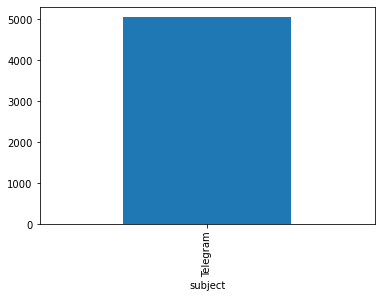

In [16]:
# How many articles per subject?
print(data_telegram_rubriigid.groupby(['subject'])['text'].count())
data_telegram_rubriigid.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [19]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju', 'setu']

100%|██████████████████████████████████████████████████████████████████████████████| 5052/5052 [23:26<00:00,  3.59it/s]


(-0.5, 799.5, 499.5, -0.5)

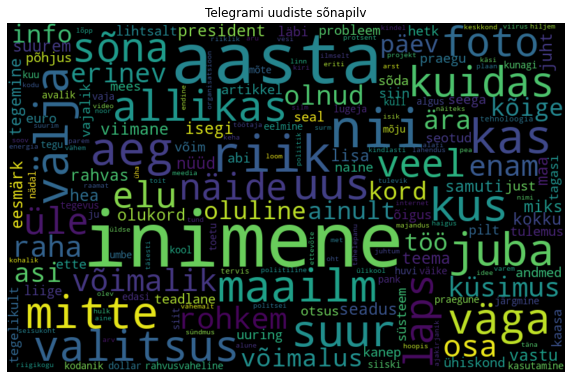

In [20]:
from wordcloud import WordCloud
from estnltk import Text
from tqdm import tqdm
#Nimisõnad ja omadussõnad
real_sonad = []
for i in tqdm(range (0, len(data_telegram_rubriigid))):
    rida = data_telegram_rubriigid.iloc[i]
    #print(rida[1])
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U' or sona[0][1] == 'D':
            real_sonad.append(sona[0][0])

all_words = ' '.join(map(str, real_sonad))

wordcloud = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Telegrami uudiste sõnapilv")
plt.savefig('Telegram_uudiste_sõnapilv.png')
plt.axis("off")